This Jupyter Notebook will run the FunWeightClust model on the Adelaide electricity demand data (available in the ads package in R). In this repository, we can find it in data/Adelaide. This dataset contains 508 electricity demand measurements for each day of the week, collected in 30 minute intervals. So our predictor variables are the measurements, and our response variables are the day of the week.

In [1]:
from pandas import read_csv
import funweightclust as fwc
raw_adelaide = read_csv("data/Adelaide/adelaide.csv")
X = raw_adelaide["X"]
Y = raw_adelaide.filter(like="Y")


Since we've loaded our data, I'm now going to plot the 100th measurement for each day of the week.

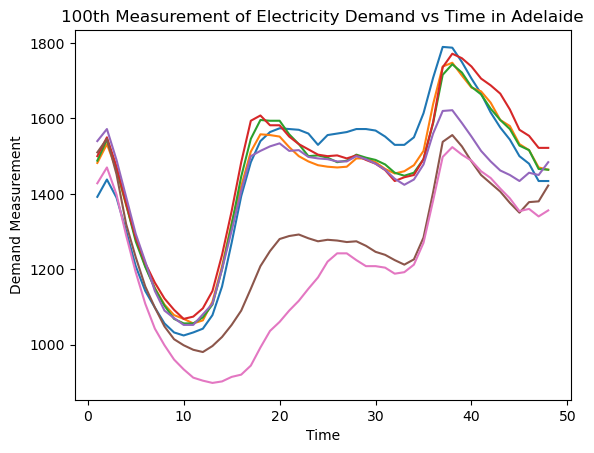

In [2]:
import matplotlib.pyplot as plt

plt.plot(X, raw_adelaide.filter(like="100"))
plt.xlabel("Time")
plt.ylabel("Demand Measurement")
plt.title("100th Measurement of Electricity Demand vs Time in Adelaide")
plt.show()

Now I will convert the rest of the data to functional data to prepare it for FunWeighClust. We have extensive data on each day, but for the purpose of this example, our predictor variable will be electricity demand curves from Sunday and Tuesday, and our response variable will be a label that denotes if a curve belongs to Sunday or Tuesday.

(1016, 51)
(1016, 51)


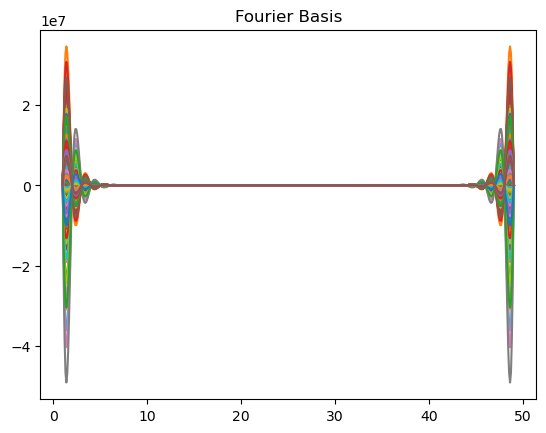

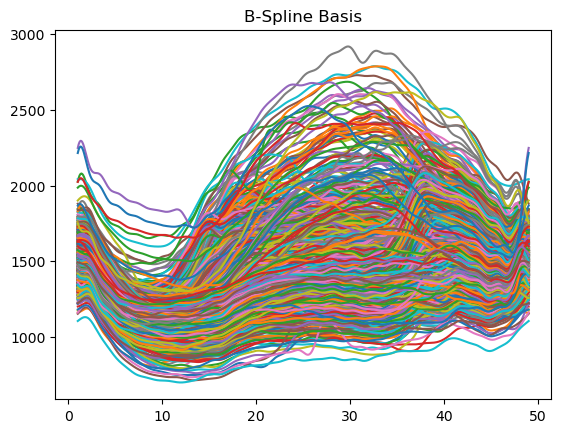

In [3]:
from process_data import constant_functional_data, create_functional_data
import numpy as np

Y = Y.filter(regex="Sun|Tue")
predictor_fourier = create_functional_data(Y.values.T, "FOURIER")
predictor_bspline = create_functional_data(Y.values.T, "BSPLINE")
predictor_fourier.plot()
plt.title("Fourier Basis")

predictor_bspline.plot()
plt.title("B-Spline Basis") 

response_raw = np.repeat([0, 1], [508, 508])
response = constant_functional_data(response_raw)
print(predictor_bspline.coefficients.shape)
print(response.coefficients.shape)

Based off of the images, I conclude that a B-Spline Basis represents the data better than a Fourier Basis. We will now be using FunWeightClust to determine whether an electricity demand curve is from Sunday or Tuesday.

In [5]:
import sklearn.metrics as met

res = fwc.funweightclust(predictor_bspline, response, K = 2, model="all", modely = "all", init="kmeans", nb_rep = 1, threshold = 0.001)
print("ARI Score:\t", met.adjusted_rand_score(res.cl, response_raw))
print("Confusion Matrix:\n", met.confusion_matrix(res.cl, response_raw))

FunWeightClust:   2.5 mins  |  Approx. remaining:       0.0 secs  |    100% complete 

        Model ModelY  K Threshold Complexity          BIC
1   AKJBKQKDK    EEI  2     0.001     692.00  -562,063.89
2   AKJBKQKDK    EVI  2     0.001     742.00  -562,410.07
3   AKJBKQKDK    VVI  2     0.001     743.00  -562,416.99
4   AKJBKQKDK    VII  2     0.001     643.00  -562,754.46
5    AKJBQKDK    VII  2     0.001     642.00  -562,891.60
6   AKJBKQKDK    VEI  2     0.001     693.00  -563,100.64
7    AKJBQKDK    EEI  2     0.001     691.00  -563,230.86
8    AKJBQKDK    EVI  2     0.001     741.00  -563,577.04
9    AKJBQKDK    VVI  2     0.001     742.00  -563,583.97
10   AKBKQKDK    EII  2     0.001     722.00  -565,523.54
11   AKBKQKDK    VII  2     0.001     723.00  -565,530.46
12   AKBKQKDK    EEI  2     0.001     772.00  -565,869.72
13   AKBKQKDK    VEI  2     0.001     773.00  -565,876.64
14   AKBKQKDK    EVI  2     0.001     822.00  -566,215.90
15   AKBKQKDK    VVI  2     0.001     823.0

From our confusion matrix, we determine that FunWeightClust predicted the correct day of the week 50% of the time. 